# Inspect interpolated event

In [62]:
import sys
import os
import ROOT
import matplotlib.pyplot as plt
import numpy as np

# Add the root folder to Python path
root_folder = os.path.abspath(os.path.join(os.getcwd(), ".."))
if root_folder not in sys.path:
    sys.path.append(root_folder)

import lib.unet_nn as UNet
import lib.base_nn as BNN
from lib.focal import FocalH


5489.0
4095.0
[[-1.72449505 -5.23719645]
 [-4.37566423 -1.36880136]]


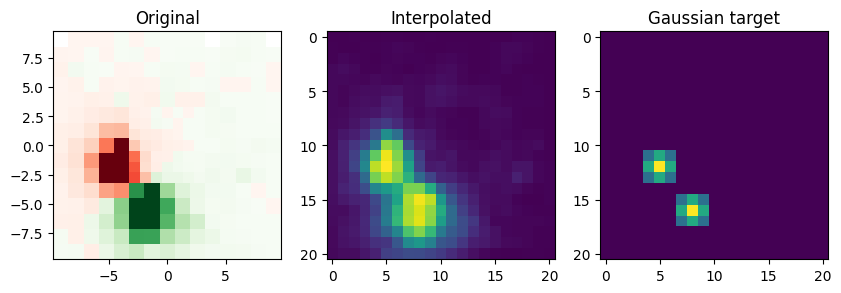

In [64]:
filename = "/home/bjartur/workspace/python_focalh_clustering/data/E300_P2_N100.root"
def plot_single(filename, event=0):
    fig,ax = plt.subplots(ncols=3, figsize=(10,5))
        
    tfile = ROOT.TFile(filename, "READ")
    ttree = tfile.Get("EventsTree")
    foc = FocalH()

    foc.heatmap_labels(ttree, event, ax[0])

    dataloader = BNN.Data()
    ret, coms, dlabels, mapping = dataloader.ttree_to_tensor(ttree, event)
    t_gauss = dataloader.gaussian_class_activation_map(coms,21,21,3)[0][0]
    print(coms)
    t_img = ret[0][0]
#    print(t_gauss)
    ax[1].imshow(t_img)
    ax[2].imshow(t_gauss)

    ax[0].set_title("Original")
    ax[1].set_title("Interpolated")
    ax[2].set_title("Gaussian target")
    
    tfile.Close()

    return fig,ax

fig,ax = plot_single(filename, 5)
fig.savefig("interpolated.pdf", bbox_inches="tight")

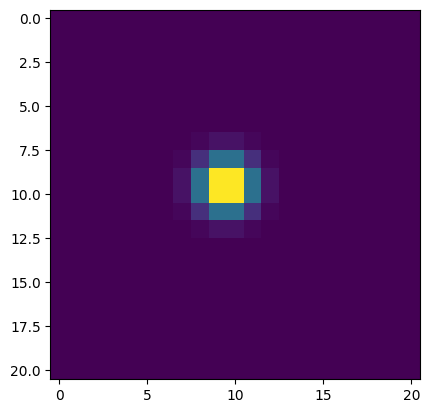

In [74]:
dataloader = BNN.Data()
#ret, coms, dlabels, mapping = dataloader.ttree_to_tensor(ttree, event)
gauss_synth = dataloader.gaussian_class_activation_map(np.array([[0,0]]),21,21,10)[0][0]
#com = self.com(npx, npy, npval, nplabels, npfracs, 0.75)
plt.imshow(gauss_synth)
